# Introduction

Treat an autoencoder as a manifold learner for MNIST. Investigate:

1. Two dimensional latent code
2. Three dimensional latent code
3. Using convolutional layers

# Imports / load data

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(64)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)


ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache()
# ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_test = ds_test.batch(1000)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead set
data_dir=gs://tfds-data/datasets.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.0. Subsequent calls will reuse this data.


In [ ]:
for i in ds_train.take(1):
  print(i[0])

In [ ]:
for i in ds_test.take(1):
  print(i[0].shape)

(100, 28, 28, 1)


# Two dimensional latent code

In [ ]:
act='tanh'

enc = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation=act),
  tf.keras.layers.Dense(128,activation=act),
  tf.keras.layers.Dense(2, activation=act)
])

dec = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2, )),
  tf.keras.layers.Dense(256,activation=act),  
  tf.keras.layers.Dense(28 * 28 * 1,activation=act),
  tf.keras.layers.Reshape((28,28,1,))  
])


opt = tf.optimizers.Adam(1e-4)




for epoch in range(5):
  for batch in ds_train:
    with tf.GradientTape() as tape:
      recons = dec(enc(batch[0]))
      loss = tf.linalg.norm(recons-batch[0],axis=[1,2])
      loss = tf.reduce_mean(loss)
      print(loss)
      (g_enc, g_dec) = tape.gradient(loss,(enc.trainable_variables, dec.trainable_variables))
    opt.apply_gradients(zip(g_enc, enc.trainable_variables))
    opt.apply_gradients(zip(g_dec, dec.trainable_variables))

## Check reconstructions

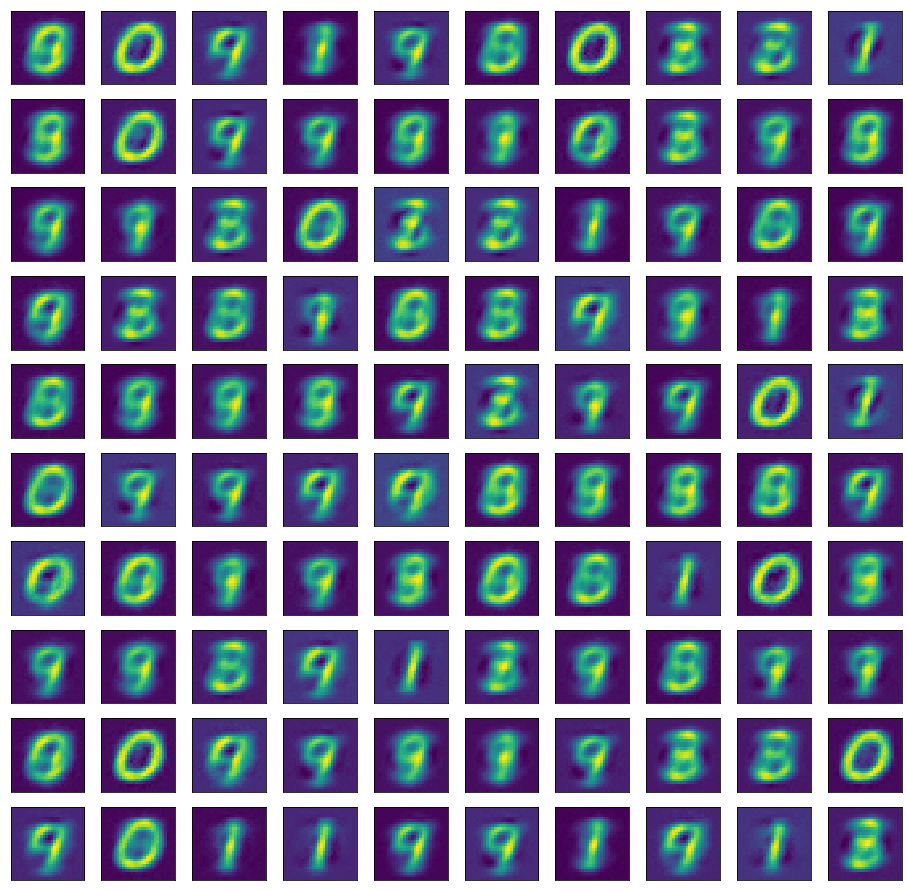

In [ ]:
import matplotlib.pyplot as plt


for test_images in ds_test.take(1):
  test_images = test_images[0][0:100,:,:]
  recons = dec(enc(test_images))
  images = recons.numpy().reshape((100,28,28))

  fig, axes = plt.subplots(10, 10, figsize=(16,16))
  for row in range(len(axes)):
    for col in range(len(axes[row])):
      axes[row][col].get_xaxis().set_visible(False)
      axes[row][col].get_yaxis().set_visible(False)
      axes[row][col].matshow(images[row*10+col])
      # axes[row][col].matshow(latents[row*10+col])

## 2D projection

(1000, 2)


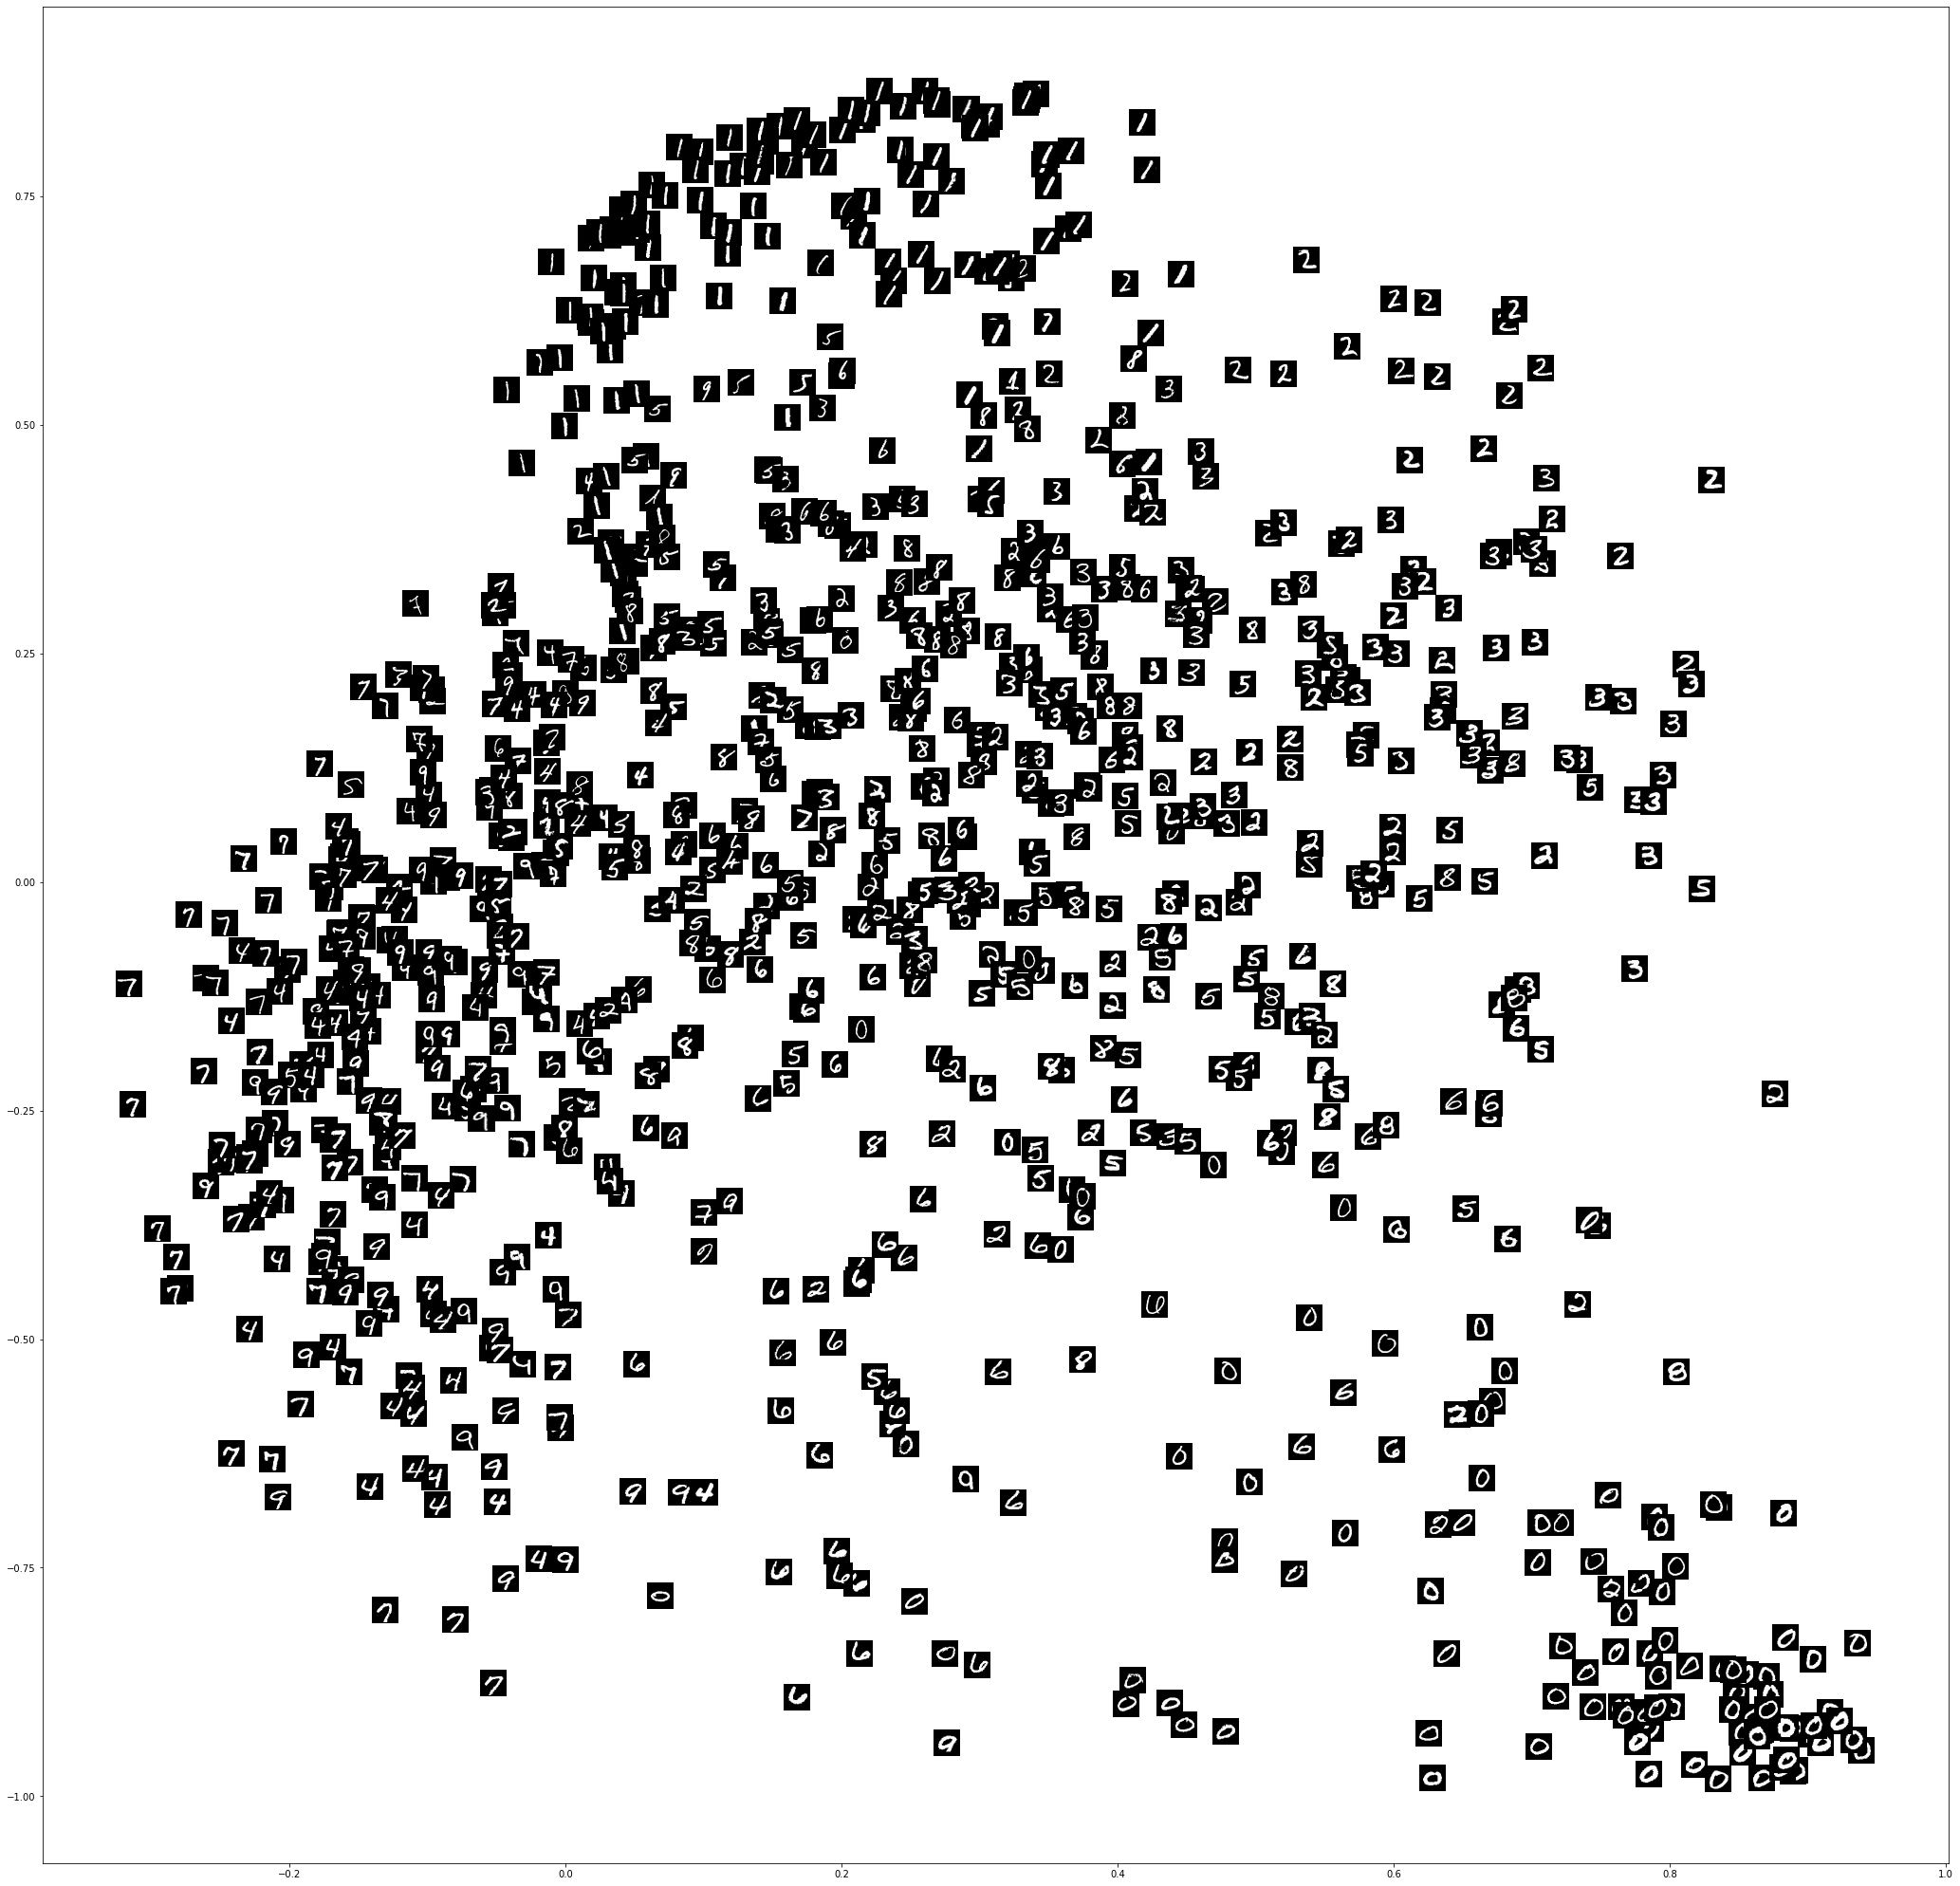

In [ ]:
def show_projection():
 


  # from random import randrange
  # bidx = randrange(32-10)
  # batch = train_images[0:32,:,:,:]
  # d_0_real, d_1_real = discriminator(batch, training=False)
  # d = d_1_real.numpy()
  # print(d.shape)

  import matplotlib.pyplot as plt
  from matplotlib.offsetbox import OffsetImage, AnnotationBbox

  def getImage(idx, image):
    # print(image)
    # image = (image + 1.)/2.
    fig=plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imsave(str(idx)+'.png', tf.squeeze(image), cmap='gray')
    plt.close()
    return OffsetImage(plt.imread(str(idx)+'.png'))



  

  it = iter(ds_test)
  batch_in = it.get_next()


  e = enc(batch_in).numpy()
  batch_in = batch_in[0].numpy()
  print(e.shape)

  x = e[:,0]
  y = e[:,1]
  


  fig, ax = plt.subplots(figsize=(36,36))
  ax.scatter(x, y) 
  # plt.xlim(-1.2, 1.2)
  # plt.ylim(-1.2, 1.2)
  



  for idx in range(x.shape[0]):
    if True:#-1. <= y[idx] <= -0.2 and -1.0 <= z[idx] <= -0.2:
      xp = x[idx]
      yp = y[idx]
      # ab = AnnotationBbox(getImage(idx, batch_in['image'][idx]), (xp, yp), frameon=False)
      ab = AnnotationBbox(getImage(idx, batch_in[idx].reshape((28,28))), (xp, yp), frameon=False)
      ax.add_artist(ab)

show_projection()

# Three dimensional latent code


In [ ]:
act='tanh'

enc = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128,activation=act),
  tf.keras.layers.Dense(128,activation=act),
  tf.keras.layers.Dense(3, activation=act)
])

dec = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(3, )),
  tf.keras.layers.Dense(256,activation=act),  
  tf.keras.layers.Dense(28 * 28 * 1,activation=act),
  tf.keras.layers.Reshape((28,28,1,))  
])


opt = tf.optimizers.Adam(1e-4)




for epoch in range(5):
  for batch in ds_train:
    with tf.GradientTape() as tape:
      recons = dec(enc(batch[0]))
      loss = tf.linalg.norm(recons-batch[0],axis=[1,2])
      loss = tf.reduce_mean(loss)
      print(loss)
      (g_enc, g_dec) = tape.gradient(loss,(enc.trainable_variables, dec.trainable_variables))
    opt.apply_gradients(zip(g_enc, enc.trainable_variables))
    opt.apply_gradients(zip(g_dec, dec.trainable_variables))

## Check reconstructions

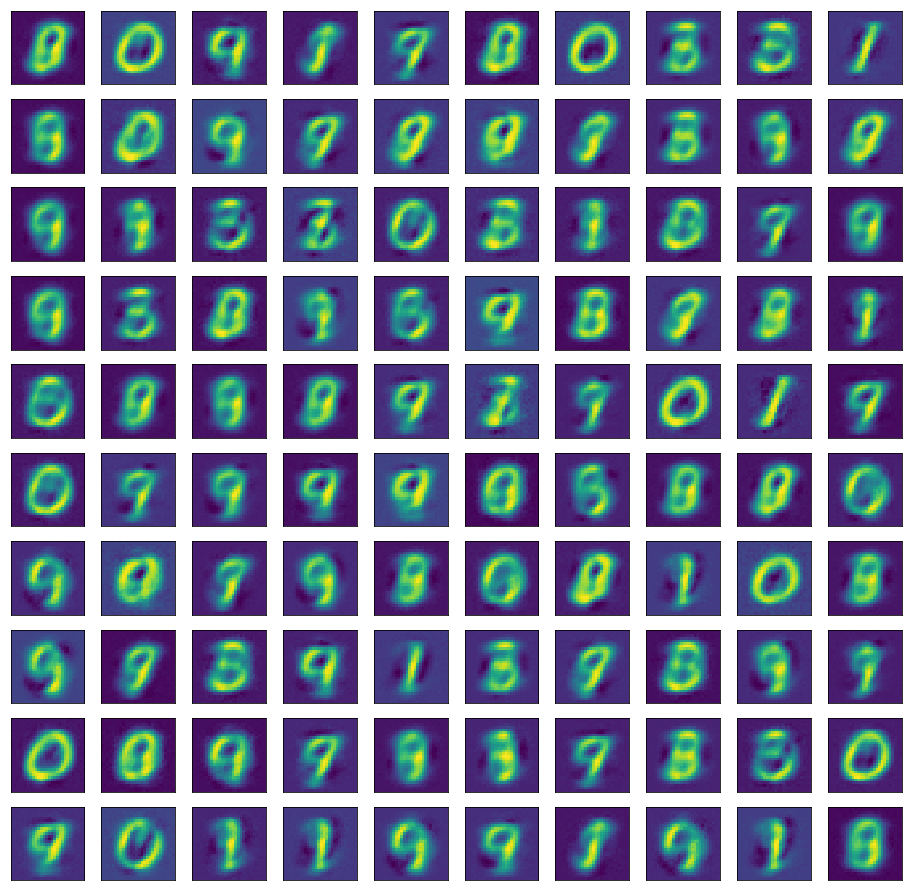

In [ ]:
import matplotlib.pyplot as plt


for test_images in ds_test.take(1):
  test_images = test_images[0][0:100,:,:]
  recons = dec(enc(test_images))
  images = recons.numpy().reshape((100,28,28))

  fig, axes = plt.subplots(10, 10, figsize=(16,16))
  for row in range(len(axes)):
    for col in range(len(axes[row])):
      axes[row][col].get_xaxis().set_visible(False)
      axes[row][col].get_yaxis().set_visible(False)
      axes[row][col].matshow(images[row*10+col])
      # axes[row][col].matshow(latents[row*10+col])

## 2D projection

(1000, 3)


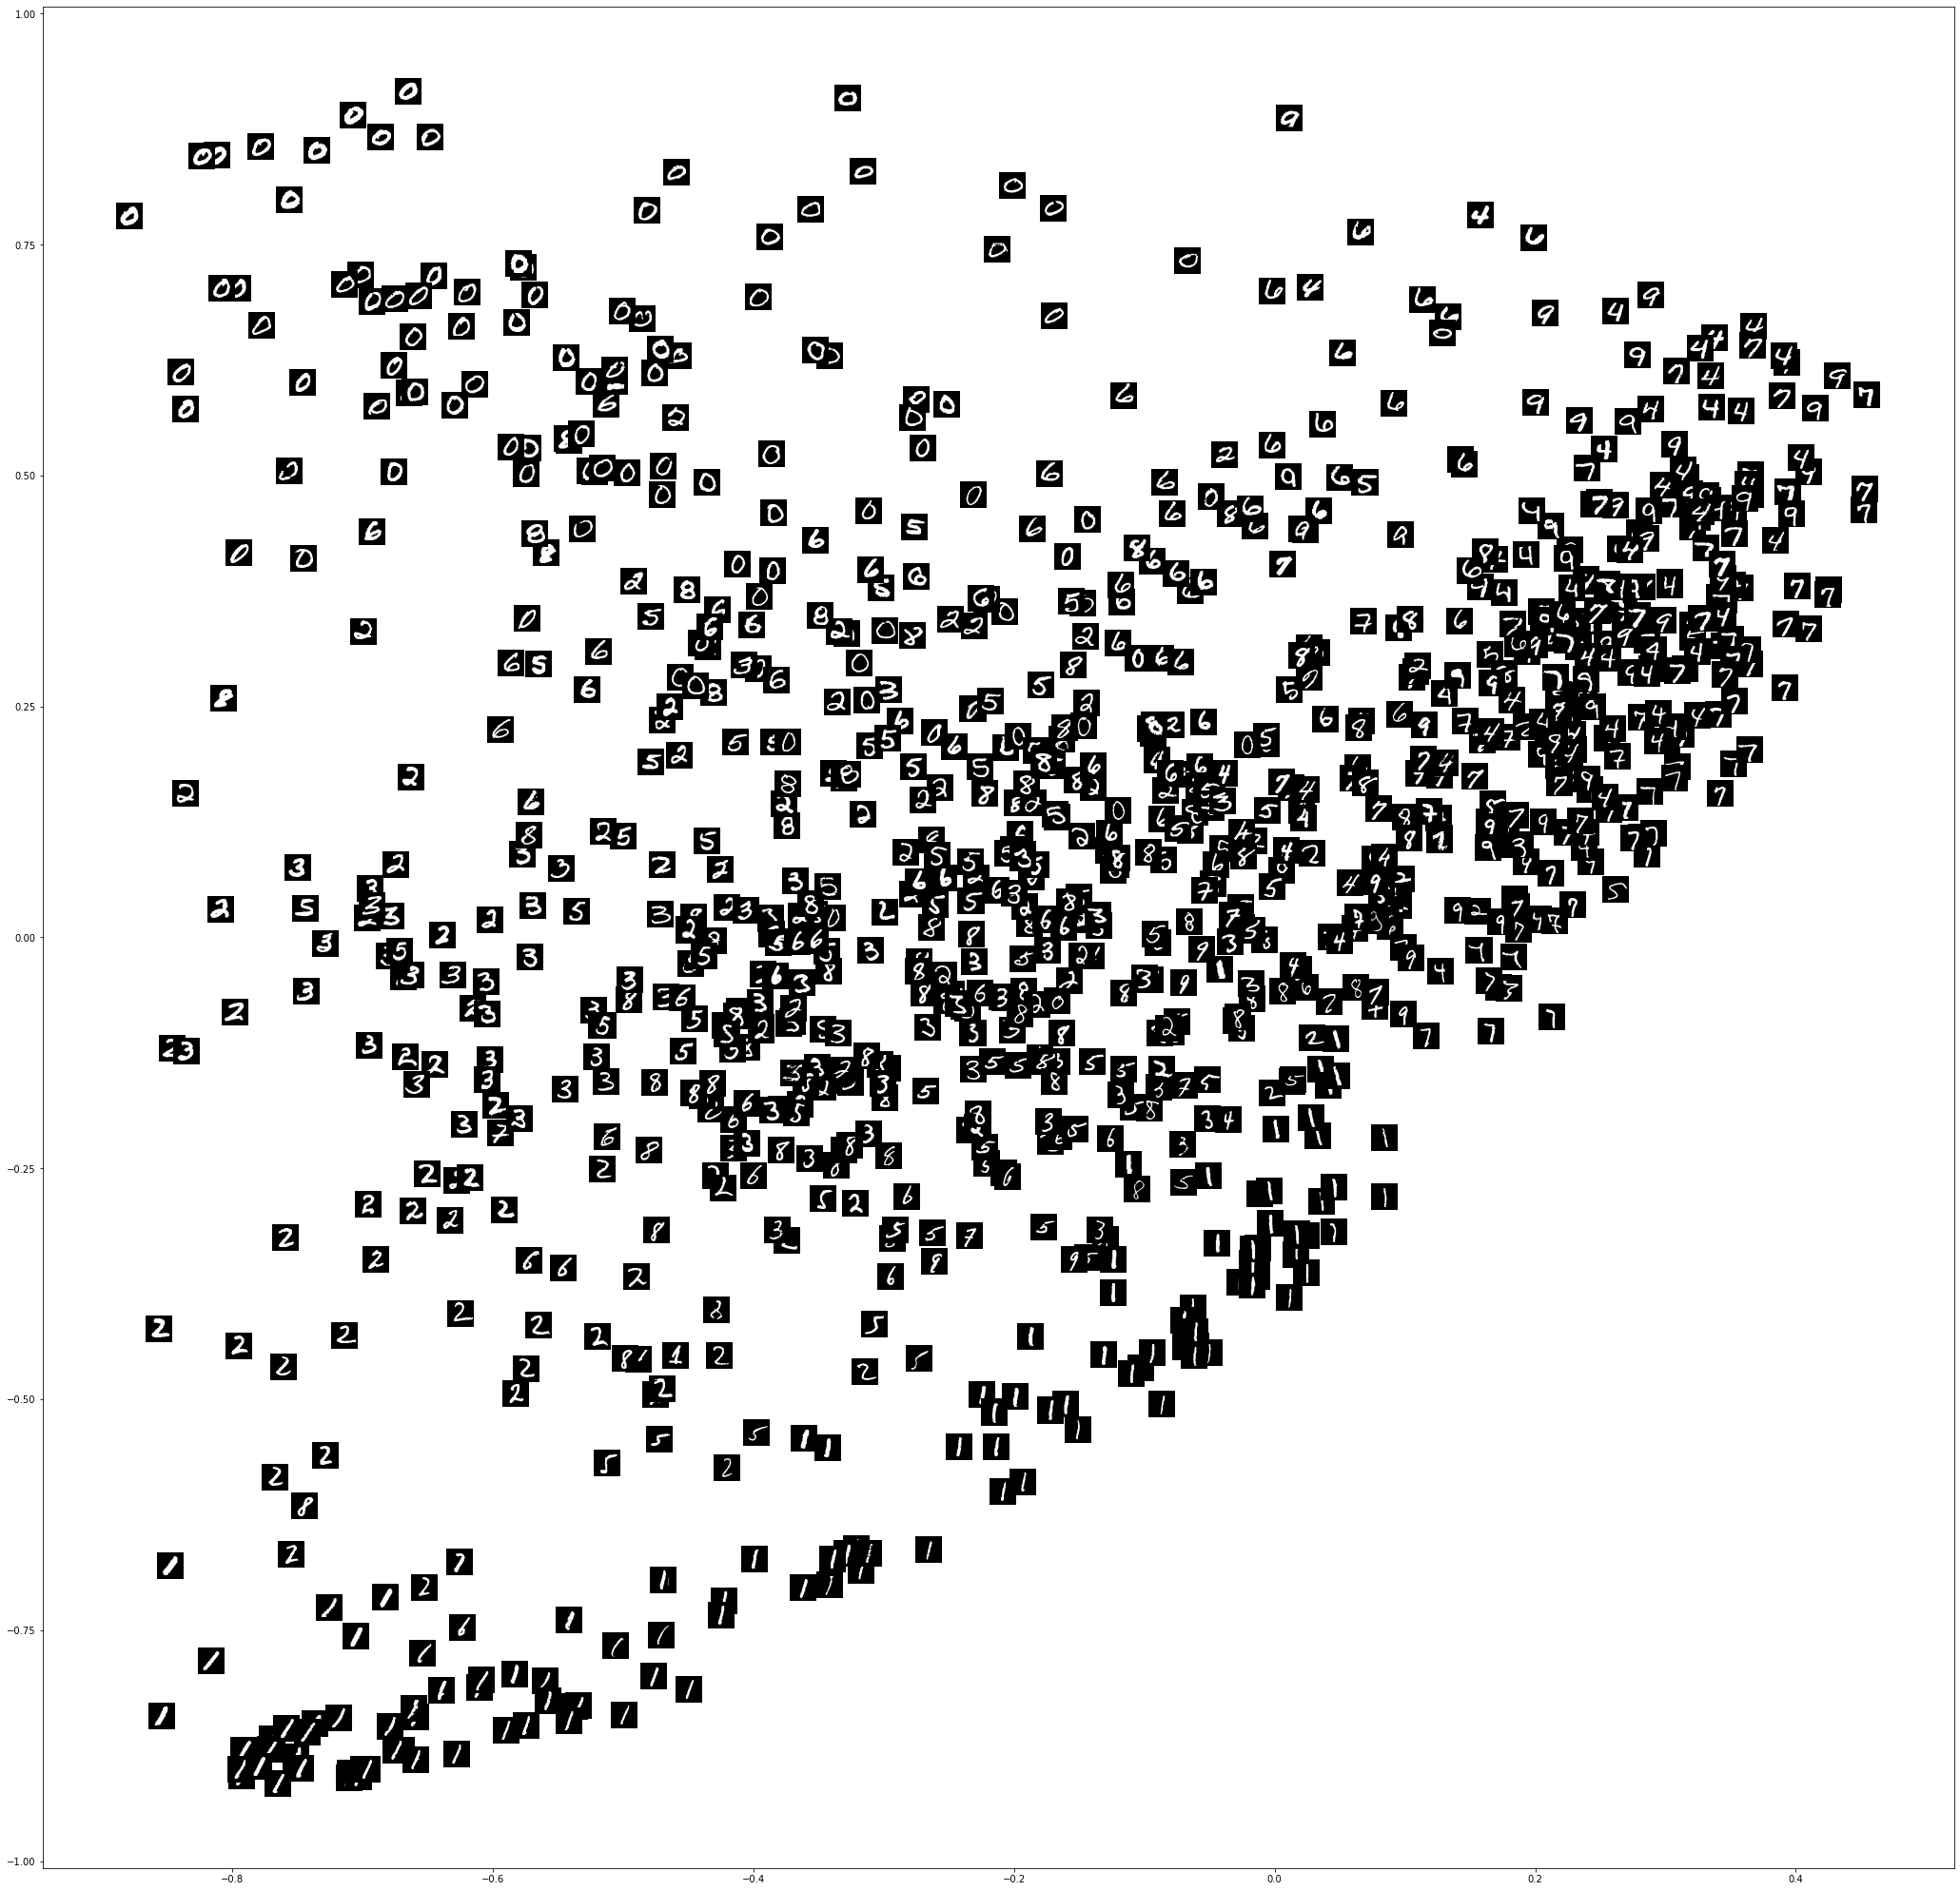

In [ ]:
def show_projection():
 


  # from random import randrange
  # bidx = randrange(32-10)
  # batch = train_images[0:32,:,:,:]
  # d_0_real, d_1_real = discriminator(batch, training=False)
  # d = d_1_real.numpy()
  # print(d.shape)

  import matplotlib.pyplot as plt
  from matplotlib.offsetbox import OffsetImage, AnnotationBbox

  def getImage(idx, image):
    # print(image)
    # image = (image + 1.)/2.
    fig=plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imsave(str(idx)+'.png', tf.squeeze(image), cmap='gray')
    plt.close()
    return OffsetImage(plt.imread(str(idx)+'.png'))



  

  it = iter(ds_test)
  batch_in = it.get_next()


  e = enc(batch_in).numpy()
  batch_in = batch_in[0].numpy()
  print(e.shape)

  x = e[:,0]
  y = e[:,1]
  


  fig, ax = plt.subplots(figsize=(36,36))
  ax.scatter(x, y) 
  # plt.xlim(-1.2, 1.2)
  # plt.ylim(-1.2, 1.2)
  



  for idx in range(x.shape[0]):
    if True:#-1. <= y[idx] <= -0.2 and -1.0 <= z[idx] <= -0.2:
      xp = x[idx]
      yp = y[idx]
      # ab = AnnotationBbox(getImage(idx, batch_in['image'][idx]), (xp, yp), frameon=False)
      ab = AnnotationBbox(getImage(idx, batch_in[idx].reshape((28,28))), (xp, yp), frameon=False)
      ax.add_artist(ab)

show_projection()

(1000, 3)


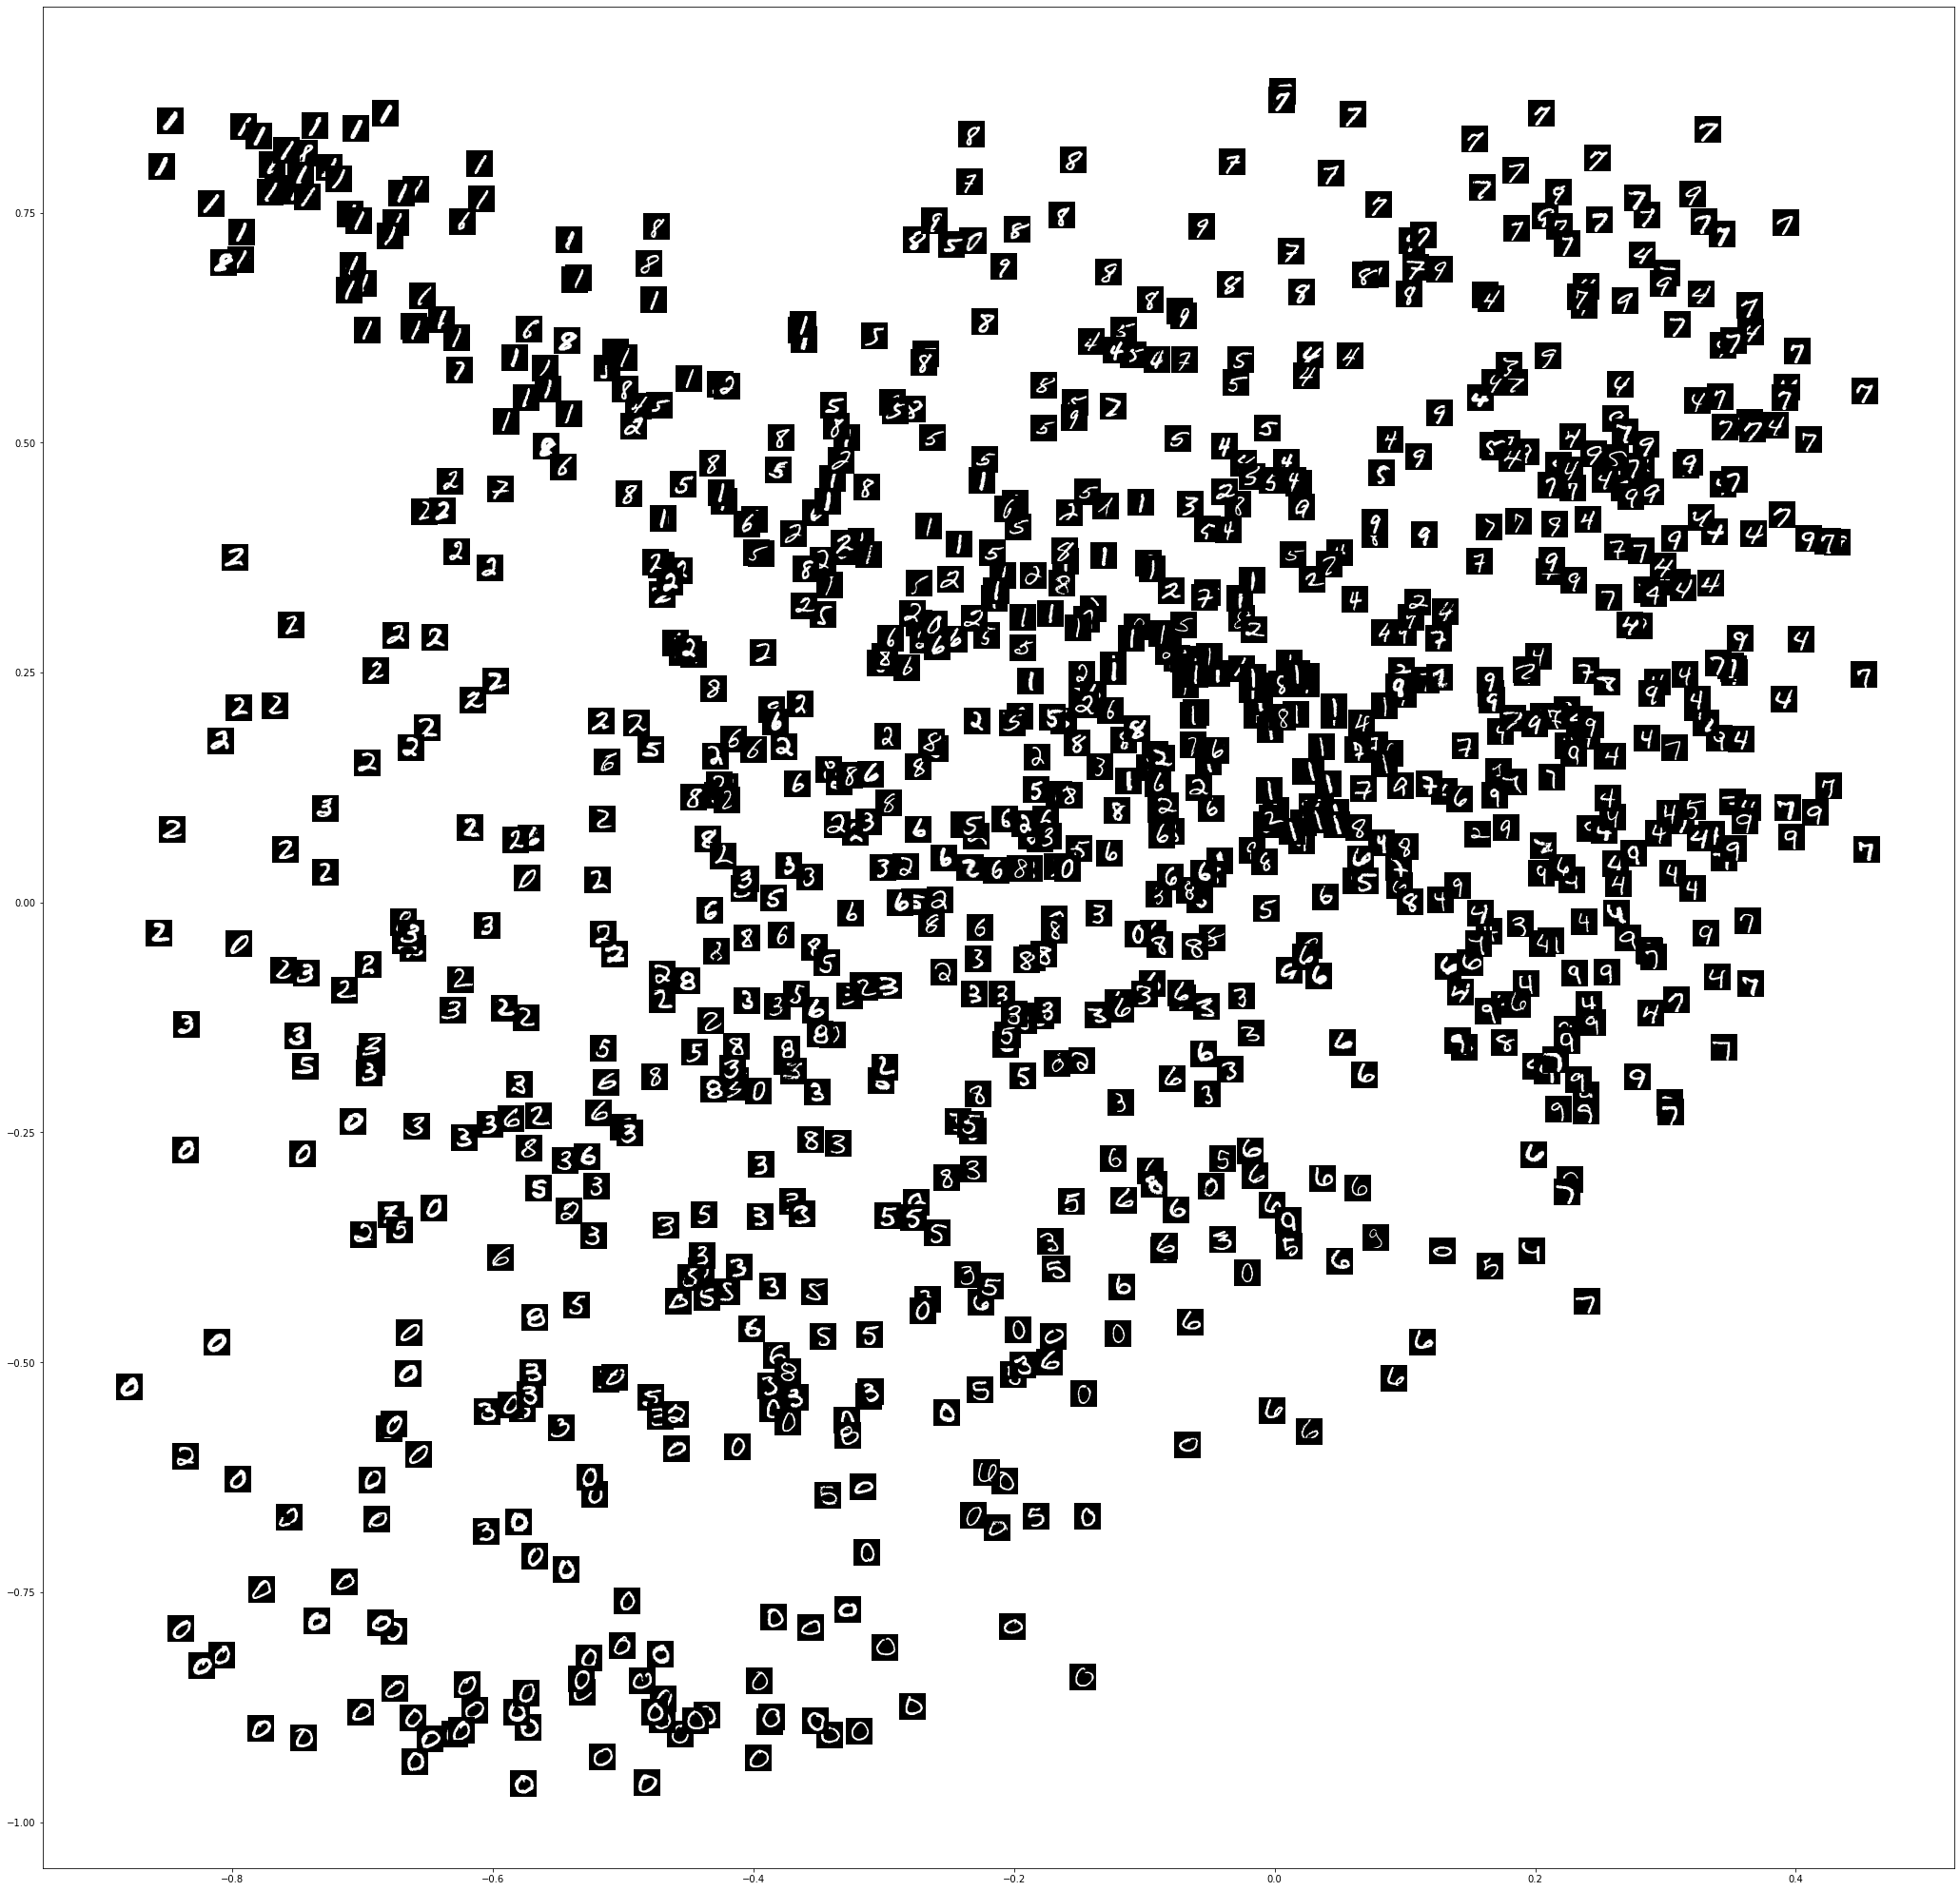

In [ ]:
def show_projection():
 


  # from random import randrange
  # bidx = randrange(32-10)
  # batch = train_images[0:32,:,:,:]
  # d_0_real, d_1_real = discriminator(batch, training=False)
  # d = d_1_real.numpy()
  # print(d.shape)

  import matplotlib.pyplot as plt
  from matplotlib.offsetbox import OffsetImage, AnnotationBbox

  def getImage(idx, image):
    # print(image)
    # image = (image + 1.)/2.
    fig=plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imsave(str(idx)+'.png', tf.squeeze(image), cmap='gray')
    plt.close()
    return OffsetImage(plt.imread(str(idx)+'.png'))



  

  it = iter(ds_test)
  batch_in = it.get_next()


  e = enc(batch_in).numpy()
  batch_in = batch_in[0].numpy()
  print(e.shape)

  x = e[:,0]
  y = e[:,2]
  


  fig, ax = plt.subplots(figsize=(36,36))
  ax.scatter(x, y) 
  # plt.xlim(-1.2, 1.2)
  # plt.ylim(-1.2, 1.2)
  



  for idx in range(x.shape[0]):
    if True:#-1. <= y[idx] <= -0.2 and -1.0 <= z[idx] <= -0.2:
      xp = x[idx]
      yp = y[idx]
      # ab = AnnotationBbox(getImage(idx, batch_in['image'][idx]), (xp, yp), frameon=False)
      ab = AnnotationBbox(getImage(idx, batch_in[idx].reshape((28,28))), (xp, yp), frameon=False)
      ax.add_artist(ab)

show_projection()

(1000, 3)


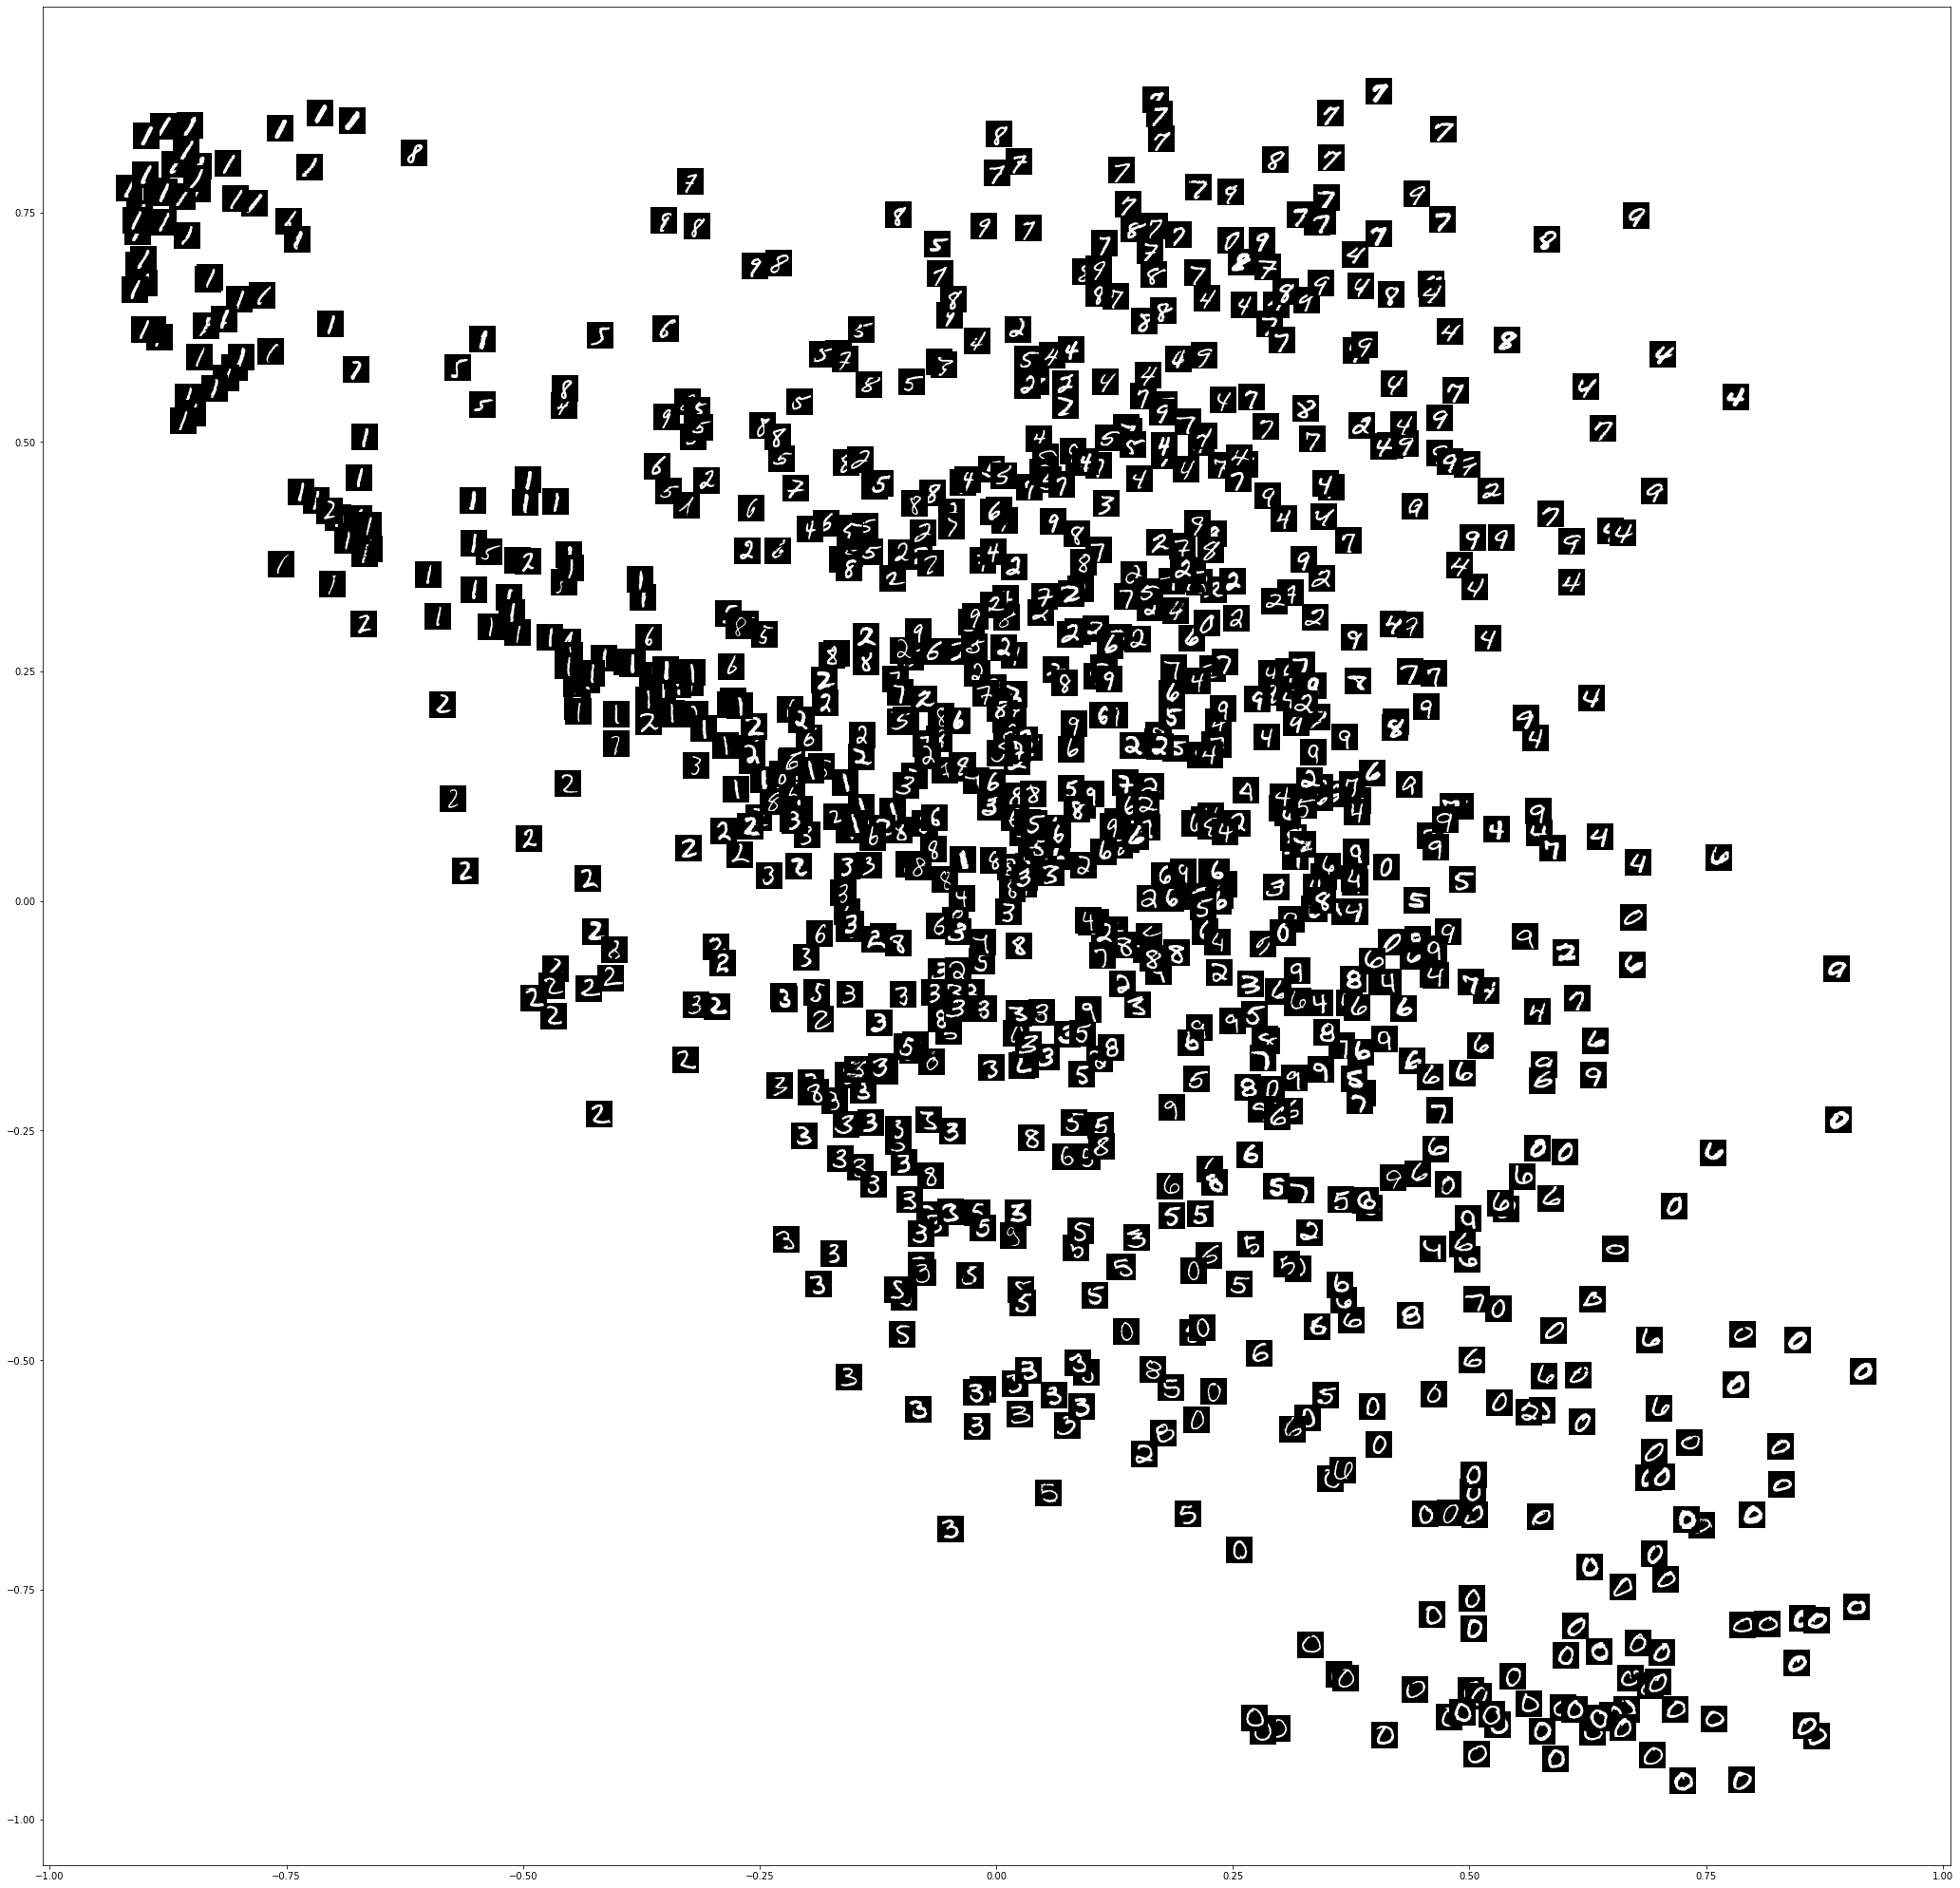

In [ ]:
def show_projection():
 


  # from random import randrange
  # bidx = randrange(32-10)
  # batch = train_images[0:32,:,:,:]
  # d_0_real, d_1_real = discriminator(batch, training=False)
  # d = d_1_real.numpy()
  # print(d.shape)

  import matplotlib.pyplot as plt
  from matplotlib.offsetbox import OffsetImage, AnnotationBbox

  def getImage(idx, image):
    # print(image)
    # image = (image + 1.)/2.
    fig=plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imsave(str(idx)+'.png', tf.squeeze(image), cmap='gray')
    plt.close()
    return OffsetImage(plt.imread(str(idx)+'.png'))



  

  it = iter(ds_test)
  batch_in = it.get_next()


  e = enc(batch_in).numpy()
  batch_in = batch_in[0].numpy()
  print(e.shape)

  x = e[:,1]
  y = e[:,2]
  


  fig, ax = plt.subplots(figsize=(36,36))
  ax.scatter(x, y) 
  # plt.xlim(-1.2, 1.2)
  # plt.ylim(-1.2, 1.2)
  



  for idx in range(x.shape[0]):
    if True:#-1. <= y[idx] <= -0.2 and -1.0 <= z[idx] <= -0.2:
      xp = x[idx]
      yp = y[idx]
      # ab = AnnotationBbox(getImage(idx, batch_in['image'][idx]), (xp, yp), frameon=False)
      ab = AnnotationBbox(getImage(idx, batch_in[idx].reshape((28,28))), (xp, yp), frameon=False)
      ax.add_artist(ab)

show_projection()

# Use a convolutional encoder and decoder

### Latent code dimension 2

In [2]:
act='tanh'

enc = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), filters=16, kernel_size=(3,3), activation=act),                                    
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=act),
  tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), activation=act),
  tf.keras.layers.Reshape((22*22,)),
  tf.keras.layers.Dense(2, activation=act)                                    
])


dec = tf.keras.models.Sequential([
  tf.keras.layers.Dense(24*24*1, input_shape=(2, ),activation=act),
  tf.keras.layers.Reshape((24,24,1,)),  
  tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(3,3), activation=act),
  tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(3,3), activation=act)  
])


input = iter(ds_train).next()[0]
print(dec(enc(input)).shape)



opt = tf.optimizers.Adam(1e-4)




for epoch in range(5):
  for batch in ds_train:
    with tf.GradientTape() as tape:
      recons = dec(enc(batch[0]))
      loss = tf.linalg.norm(recons-batch[0],axis=[1,2])
      loss = tf.reduce_mean(loss)      
      (g_enc, g_dec) = tape.gradient(loss,(enc.trainable_variables, dec.trainable_variables))
    opt.apply_gradients(zip(g_enc, enc.trainable_variables))
    opt.apply_gradients(zip(g_dec, dec.trainable_variables))
  print(loss)

(64, 28, 28, 1)
tf.Tensor(6.663014, shape=(), dtype=float32)
tf.Tensor(6.7318726, shape=(), dtype=float32)
tf.Tensor(6.7795987, shape=(), dtype=float32)
tf.Tensor(6.6976485, shape=(), dtype=float32)
tf.Tensor(6.7445307, shape=(), dtype=float32)


## Check reconstructions

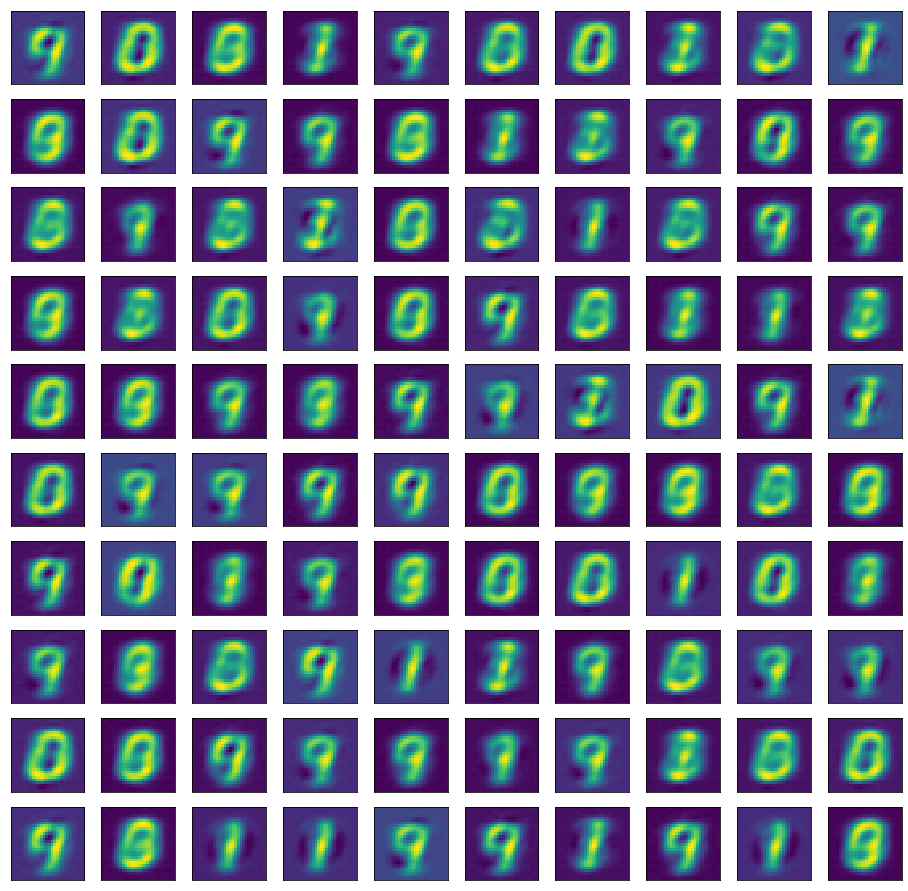

In [3]:
import matplotlib.pyplot as plt


for test_images in ds_test.take(1):
  test_images = test_images[0][0:100,:,:]
  recons = dec(enc(test_images))
  images = recons.numpy().reshape((100,28,28))

  fig, axes = plt.subplots(10, 10, figsize=(16,16))
  for row in range(len(axes)):
    for col in range(len(axes[row])):
      axes[row][col].get_xaxis().set_visible(False)
      axes[row][col].get_yaxis().set_visible(False)
      axes[row][col].matshow(images[row*10+col])
      # axes[row][col].matshow(latents[row*10+col])

## 2D projection

(1000, 2)


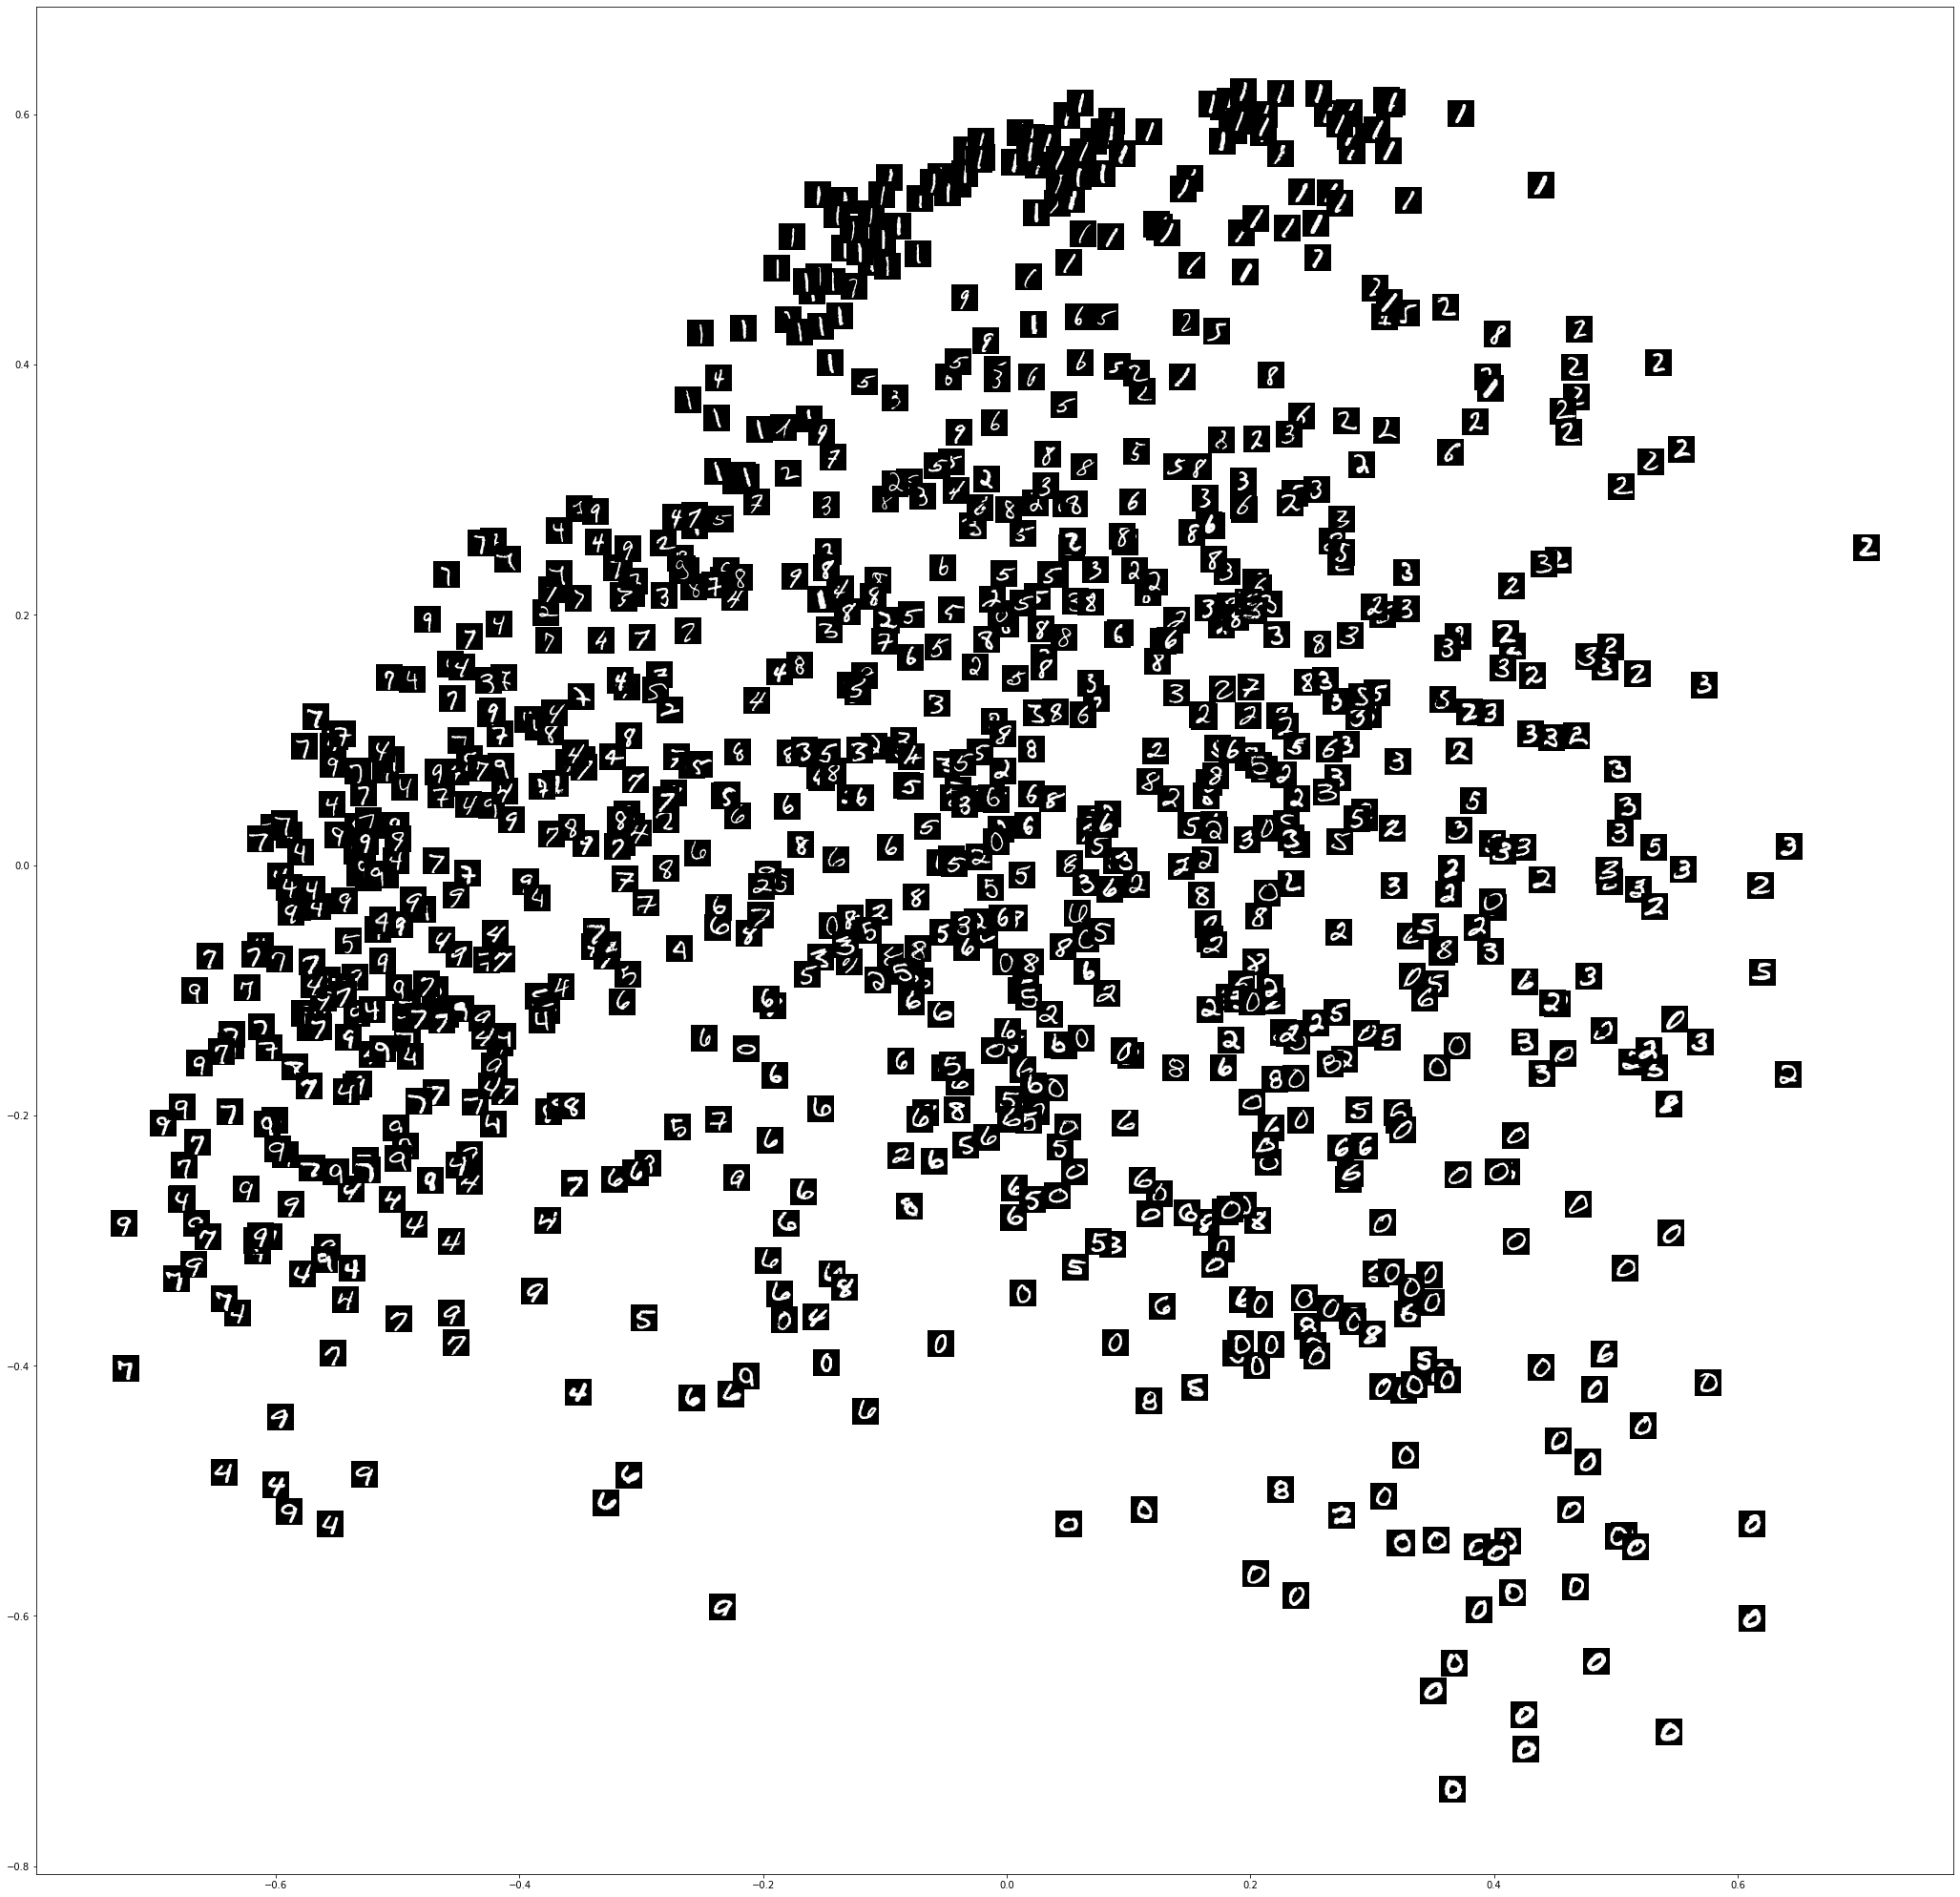

In [4]:
def show_projection():
 


  # from random import randrange
  # bidx = randrange(32-10)
  # batch = train_images[0:32,:,:,:]
  # d_0_real, d_1_real = discriminator(batch, training=False)
  # d = d_1_real.numpy()
  # print(d.shape)

  import matplotlib.pyplot as plt
  from matplotlib.offsetbox import OffsetImage, AnnotationBbox

  def getImage(idx, image):
    # print(image)
    # image = (image + 1.)/2.
    fig=plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imsave(str(idx)+'.png', tf.squeeze(image), cmap='gray')
    plt.close()
    return OffsetImage(plt.imread(str(idx)+'.png'))



  

  it = iter(ds_test)
  batch_in = it.get_next()


  e = enc(batch_in).numpy()
  batch_in = batch_in[0].numpy()
  print(e.shape)

  x = e[:,0]
  y = e[:,1]
  


  fig, ax = plt.subplots(figsize=(36,36))
  ax.scatter(x, y) 
  # plt.xlim(-1.2, 1.2)
  # plt.ylim(-1.2, 1.2)
  



  for idx in range(x.shape[0]):
    if True:#-1. <= y[idx] <= -0.2 and -1.0 <= z[idx] <= -0.2:
      xp = x[idx]
      yp = y[idx]
      # ab = AnnotationBbox(getImage(idx, batch_in['image'][idx]), (xp, yp), frameon=False)
      ab = AnnotationBbox(getImage(idx, batch_in[idx].reshape((28,28))), (xp, yp), frameon=False)
      ax.add_artist(ab)

show_projection()

### Latent code dimension 4

In [11]:
act='relu'

enc = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), filters=16, kernel_size=(3,3), activation=act),                                    
  tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation=act),
  tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), activation=act),
  tf.keras.layers.Reshape((22*22,)),
  tf.keras.layers.Dense(4, activation=act)                                    
])


dec = tf.keras.models.Sequential([
  tf.keras.layers.Dense(24*24*1, input_shape=(4, ),activation=act),
  tf.keras.layers.Reshape((24,24,1,)),  
  tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(3,3), activation=act),
  tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(3,3), activation=act)  
])


input = iter(ds_train).next()[0]
print(dec(enc(input)).shape)



opt = tf.optimizers.Adam(3e-4)




for epoch in range(5):
  for batch in ds_train:
    with tf.GradientTape() as tape:
      recons = dec(enc(batch[0]))
      loss = tf.linalg.norm(recons-batch[0],axis=[1,2])
      loss = tf.reduce_mean(loss)      
      (g_enc, g_dec) = tape.gradient(loss,(enc.trainable_variables, dec.trainable_variables))
    opt.apply_gradients(zip(g_enc, enc.trainable_variables))
    opt.apply_gradients(zip(g_dec, dec.trainable_variables))
  print(loss)

(64, 28, 28, 1)
tf.Tensor(5.760204, shape=(), dtype=float32)
tf.Tensor(5.3366, shape=(), dtype=float32)
tf.Tensor(5.5081215, shape=(), dtype=float32)
tf.Tensor(5.5221453, shape=(), dtype=float32)
tf.Tensor(5.7192044, shape=(), dtype=float32)


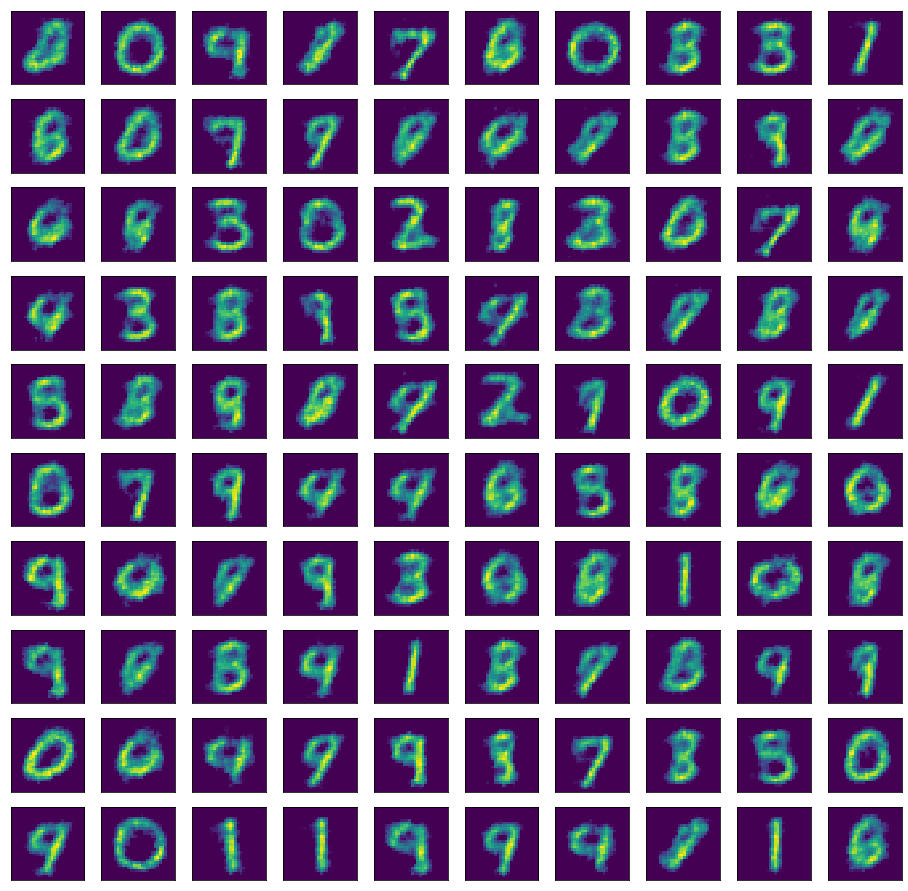

In [12]:
import matplotlib.pyplot as plt


for test_images in ds_test.take(1):
  test_images = test_images[0][0:100,:,:]
  recons = dec(enc(test_images))
  images = recons.numpy().reshape((100,28,28))

  fig, axes = plt.subplots(10, 10, figsize=(16,16))
  for row in range(len(axes)):
    for col in range(len(axes[row])):
      axes[row][col].get_xaxis().set_visible(False)
      axes[row][col].get_yaxis().set_visible(False)
      axes[row][col].matshow(images[row*10+col])
      # axes[row][col].matshow(latents[row*10+col])

(1000, 4)


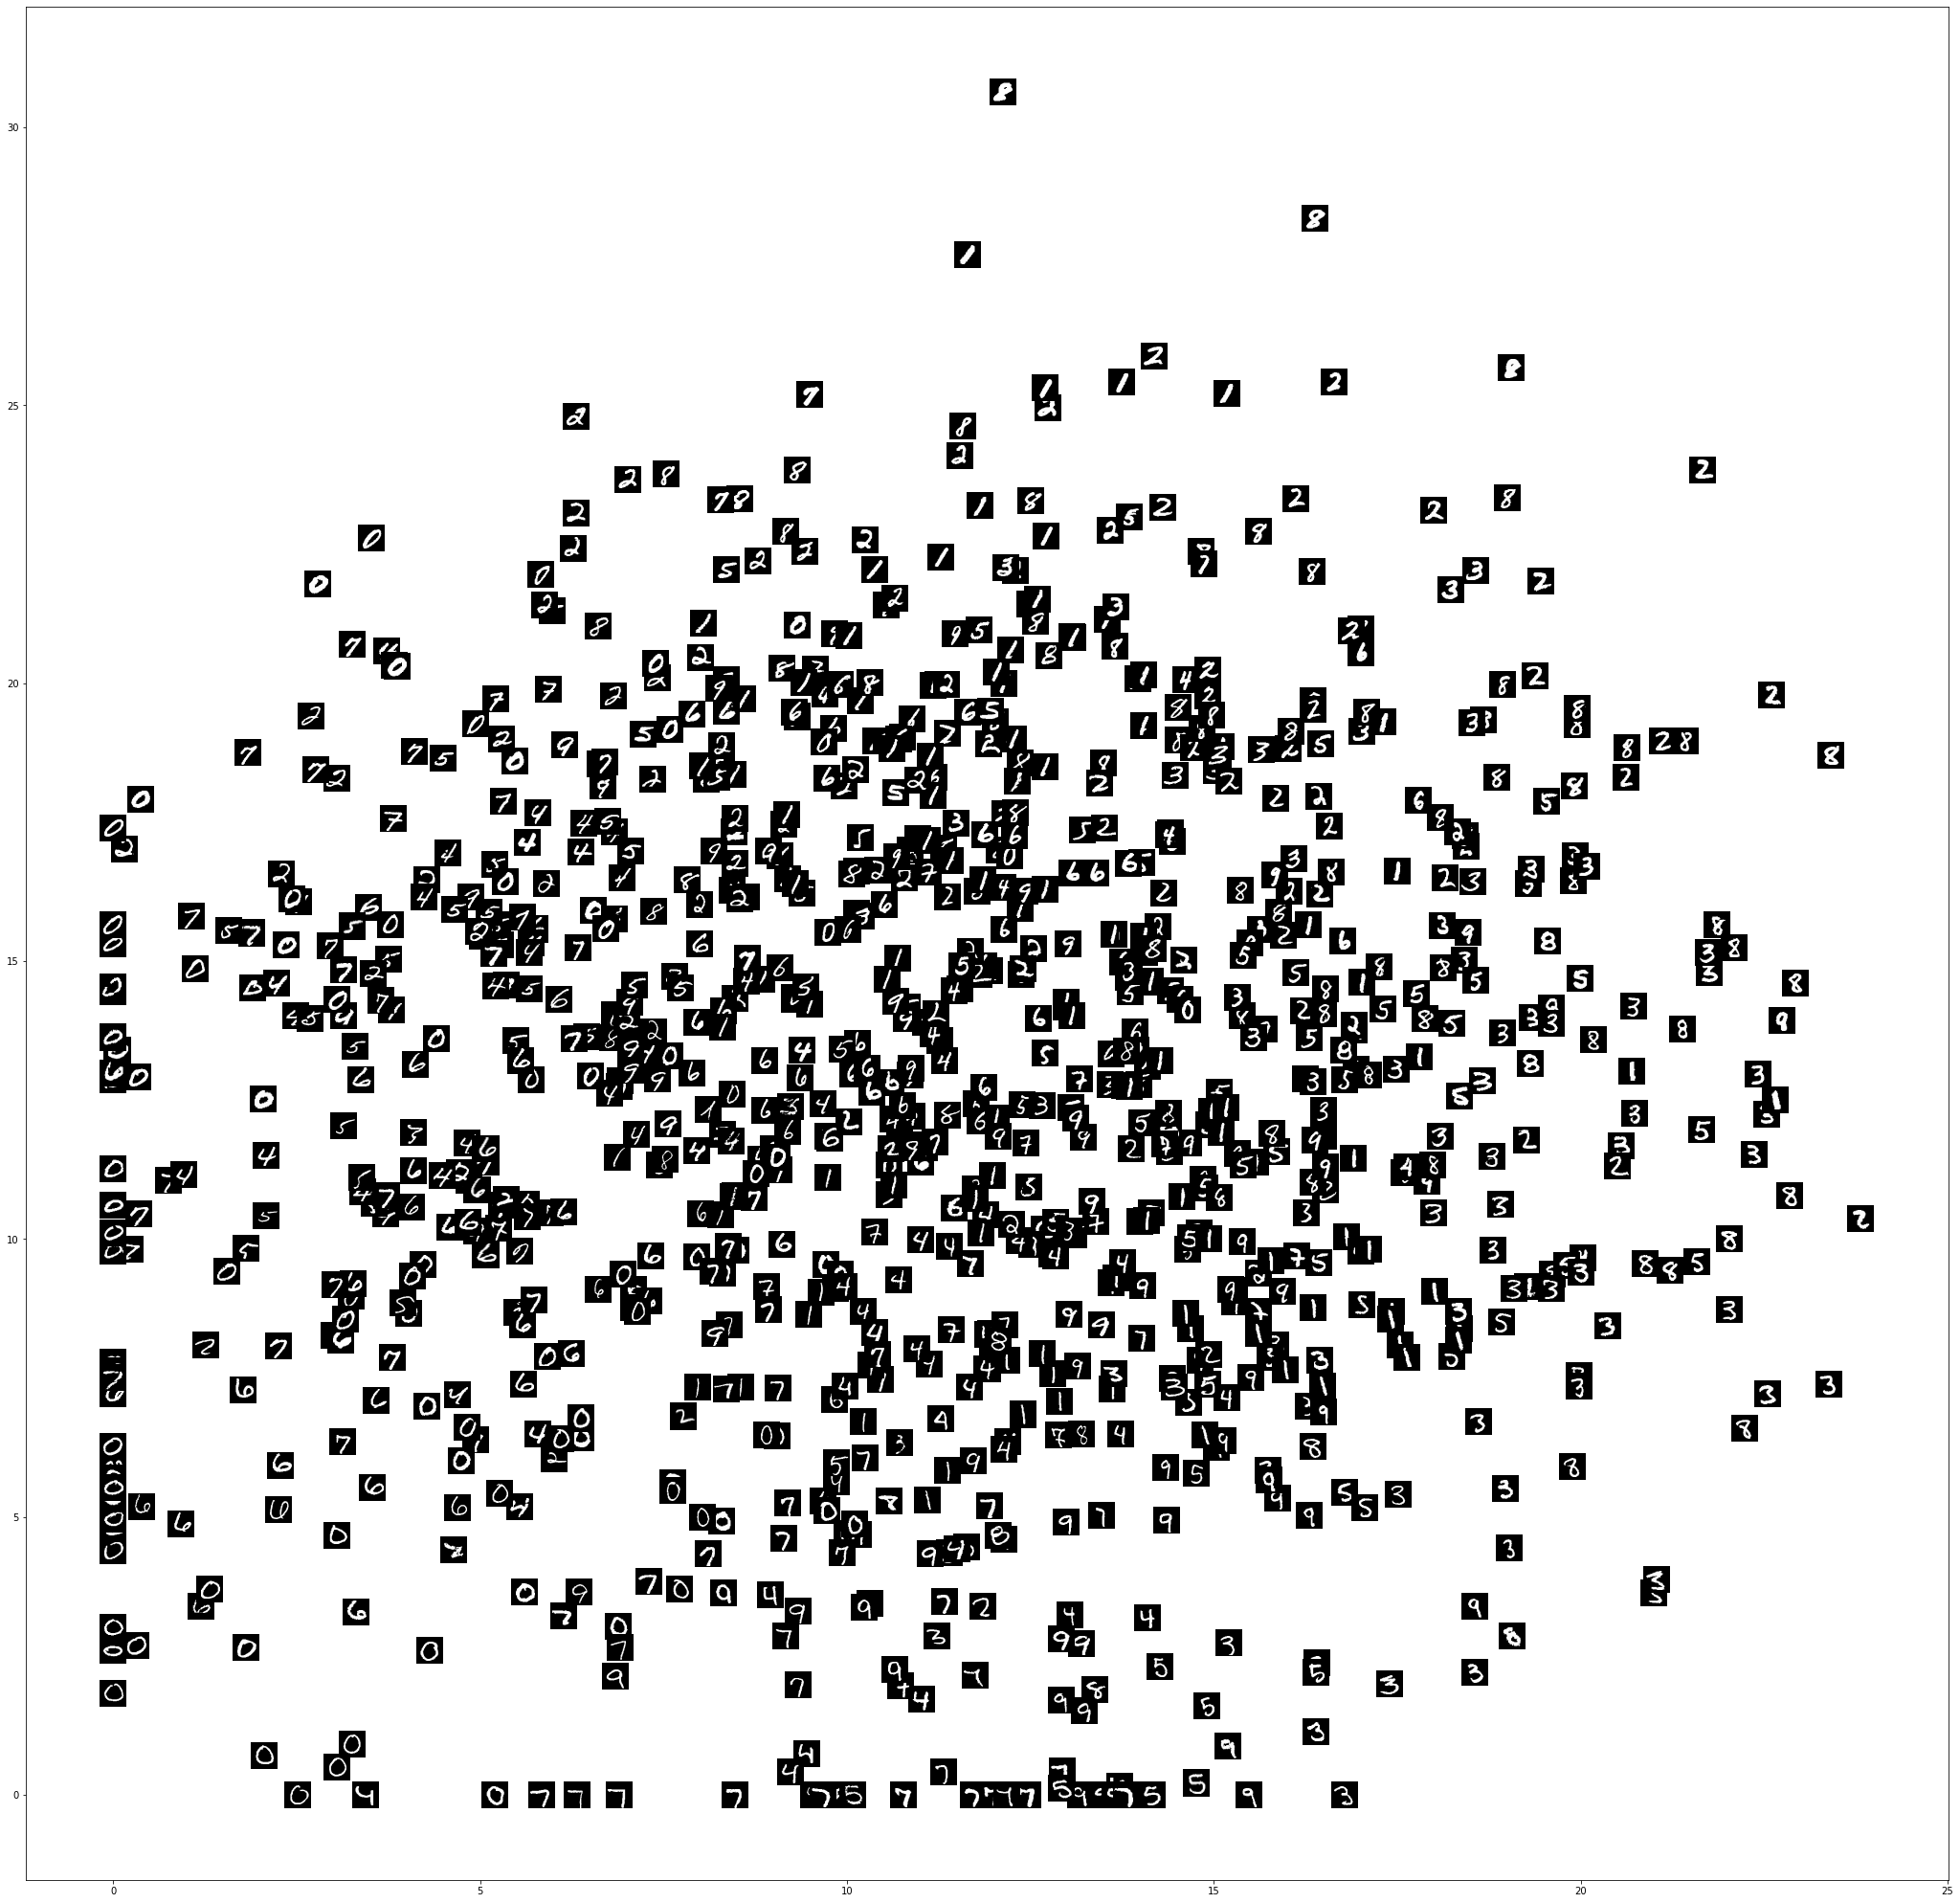

In [13]:
def show_projection():
 


  # from random import randrange
  # bidx = randrange(32-10)
  # batch = train_images[0:32,:,:,:]
  # d_0_real, d_1_real = discriminator(batch, training=False)
  # d = d_1_real.numpy()
  # print(d.shape)

  import matplotlib.pyplot as plt
  from matplotlib.offsetbox import OffsetImage, AnnotationBbox

  def getImage(idx, image):
    # print(image)
    # image = (image + 1.)/2.
    fig=plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imsave(str(idx)+'.png', tf.squeeze(image), cmap='gray')
    plt.close()
    return OffsetImage(plt.imread(str(idx)+'.png'))



  

  it = iter(ds_test)
  batch_in = it.get_next()


  e = enc(batch_in).numpy()
  batch_in = batch_in[0].numpy()
  print(e.shape)

  x = e[:,0]
  y = e[:,1]
  


  fig, ax = plt.subplots(figsize=(36,36))
  ax.scatter(x, y) 
  # plt.xlim(-1.2, 1.2)
  # plt.ylim(-1.2, 1.2)
  



  for idx in range(x.shape[0]):
    if True:#-1. <= y[idx] <= -0.2 and -1.0 <= z[idx] <= -0.2:
      xp = x[idx]
      yp = y[idx]
      # ab = AnnotationBbox(getImage(idx, batch_in['image'][idx]), (xp, yp), frameon=False)
      ab = AnnotationBbox(getImage(idx, batch_in[idx].reshape((28,28))), (xp, yp), frameon=False)
      ax.add_artist(ab)

show_projection()